In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
df = pd.read_csv('C:/Users/User/Desktop/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [23]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [24]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [25]:
med=np.median(df.duration)
print(med)

255.0


In [26]:
print(len(df))

11162


In [43]:
df['deposit']=df['deposit'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [28]:
df['default']=df['default'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,0,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,0,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,0,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,0,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [29]:
df['housing']=df['housing'].apply(lambda x:1 if x=='yes' else 0)

In [59]:
df['loan']=df['loan'].apply(lambda x:1 if x=='yes' else 0)

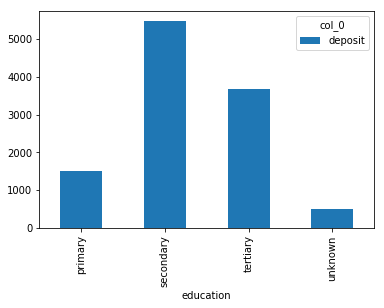

In [36]:
table1 = pd.crosstab(df["education"],'deposit').plot(kind='bar')
plt.show()

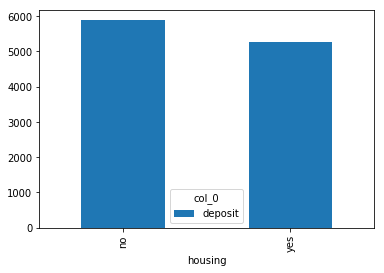

In [44]:
table1 = pd.crosstab(df["housing"],'deposit').plot(kind='bar')
plt.show()

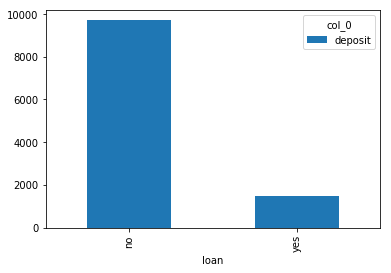

In [45]:
table1 = pd.crosstab(df["loan"],'deposit').plot(kind='bar')
plt.show()

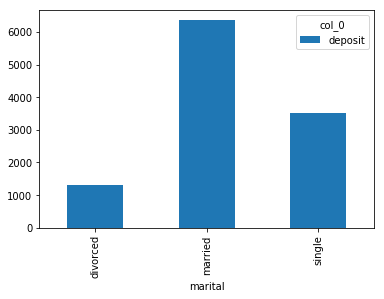

In [46]:
table1 = pd.crosstab(df["marital"],'deposit').plot(kind='bar')
plt.show()

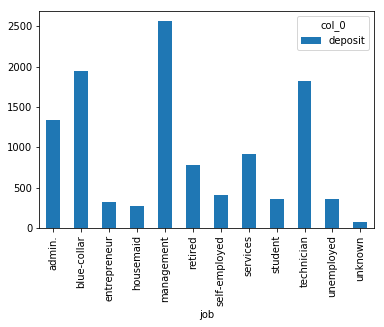

In [48]:
table1 = pd.crosstab(df["job"],'deposit').plot(kind='bar')
plt.show()

In [51]:
df = df.replace('secondary',2)
df = df.replace('primary',1)
df = df.replace('tertiary',3)
df = df.replace('unknown',0)
df = df.replace('divorced','single')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,2,no,2343,yes,no,0,5,may,1042,1,-1,0,0,1
1,56,admin.,married,2,no,45,no,no,0,5,may,1467,1,-1,0,0,1
2,41,technician,married,2,no,1270,yes,no,0,5,may,1389,1,-1,0,0,1
3,55,services,married,2,no,2476,yes,no,0,5,may,579,1,-1,0,0,1
4,54,admin.,married,3,no,184,no,no,0,5,may,673,2,-1,0,0,1
5,42,management,single,3,no,0,yes,yes,0,5,may,562,2,-1,0,0,1
6,56,management,married,3,no,830,yes,yes,0,6,may,1201,1,-1,0,0,1
7,60,retired,single,2,no,545,yes,no,0,6,may,1030,1,-1,0,0,1
8,37,technician,married,2,no,1,yes,no,0,6,may,608,1,-1,0,0,1
9,28,services,single,2,no,5090,yes,no,0,6,may,1297,3,-1,0,0,1


In [60]:
df = df.replace('single',0)
df = df.replace('married',1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,2,no,2343,yes,0,0,5,may,1042,1,-1,0,0,1
1,56,admin.,1,2,no,45,no,0,0,5,may,1467,1,-1,0,0,1
2,41,technician,1,2,no,1270,yes,0,0,5,may,1389,1,-1,0,0,1
3,55,services,1,2,no,2476,yes,0,0,5,may,579,1,-1,0,0,1
4,54,admin.,1,3,no,184,no,0,0,5,may,673,2,-1,0,0,1
5,42,management,0,3,no,0,yes,1,0,5,may,562,2,-1,0,0,1
6,56,management,1,3,no,830,yes,1,0,6,may,1201,1,-1,0,0,1
7,60,retired,0,2,no,545,yes,0,0,6,may,1030,1,-1,0,0,1
8,37,technician,1,2,no,1,yes,0,0,6,may,608,1,-1,0,0,1
9,28,services,0,2,no,5090,yes,0,0,6,may,1297,3,-1,0,0,1


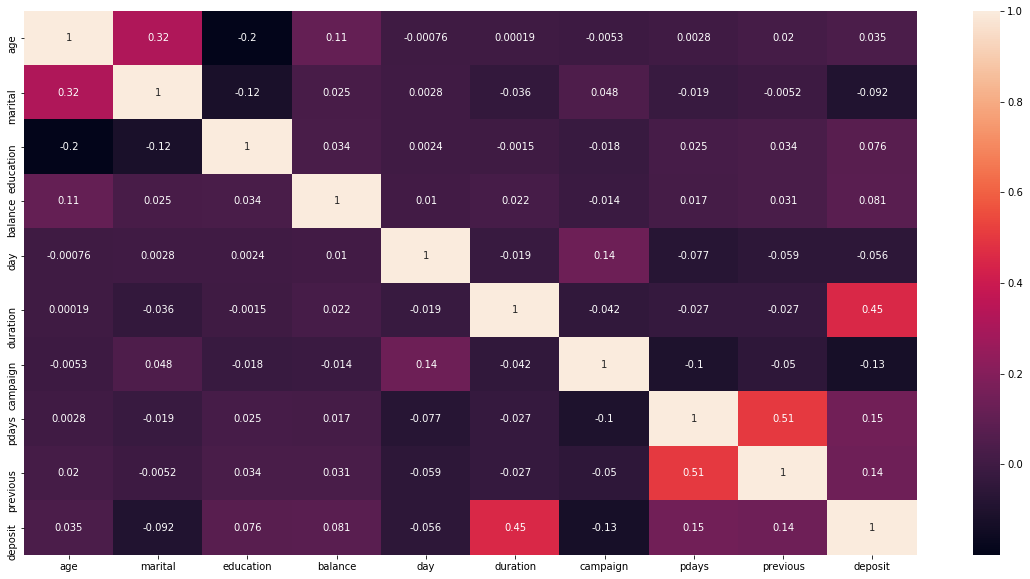

In [56]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

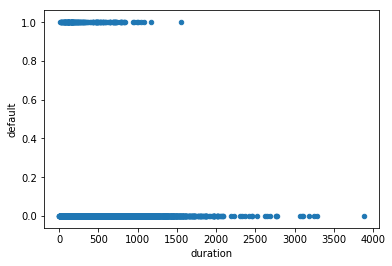

In [13]:
df.plot(x="duration",y="default",kind="scatter")
plt.show()

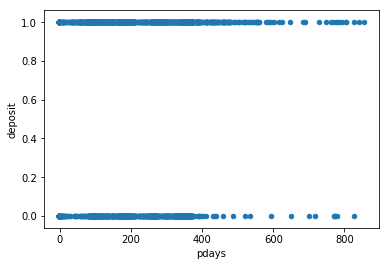

In [19]:
df.plot(x="pdays",y="deposit",kind="scatter")
plt.show()

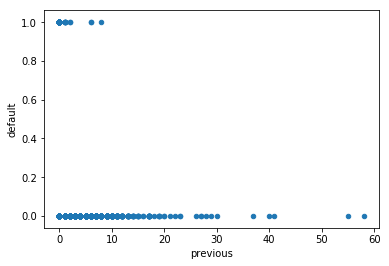

In [20]:
df.plot(x="previous",y="default",kind="scatter")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = pd.DataFrame(np.c_[df['marital'],df['duration'],df['pdays'],df['loan'],df['education']], columns = ['marital','duration','pdays','loan','education'])
Y = df['deposit']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1461  331]
 [ 549 1008]]


In [63]:
TN, FP    = confusion_matrix[0, 0], confusion_matrix[0, 1]
FN, TP    = confusion_matrix[1, 0], confusion_matrix[1, 1]

In [64]:
Accuracy = (float(TP+TN)/float(TP+FP+FN+TN))
print('Accuracy:        ',  round(Accuracy,2) ,"\n")

Accuracy:         0.74 



In [65]:
Precision = (float(TP)/float(TP+FP))
print('Precision:        ',  round(Precision,2) ,"\n")

Precision:         0.75 



In [66]:
Recall = (float(TP)/float(TP+FN))
print ('Recall:        ',round(Recall,2))

Recall:         0.65


In [67]:
Specificity = (float(TN)/float(TN+FP))
print ('Sepcificity:        ',  round(Specificity,2))

Sepcificity:         0.82


In [68]:
F1Score = (2*Precision*Recall)/(Precision+Recall)
print ('F1 Score        ',  round(F1Score,2) )

F1 Score         0.7
